In [1]:
# imports
import numpy as np
import math

import sys as sys
import os
import tkinter as tk
from tkinter import filedialog

#import matplotlib as mpl
import matplotlib.pyplot as plt
#import pylab as plb
import seaborn as sns
import pandas as pd

#from skimage import io
#from scipy.signal import argrelextrema, savgol_filter
#from scipy.optimize import curve_fit
#from scipy import exp
#from astropy import modeling
#import warnings
#from scipy.optimize import OptimizeWarning

#import time
import datetime as dt
import csv

%matplotlib inline

In [2]:
# options
zsave = True
zplot = True
zsplit = True

In [3]:
# function for debugging
def pause():
    programPause = input('Press <ENTER> to continue.')

In [4]:
root = tk.Tk()
root.withdraw()

directory = filedialog.askdirectory(title = 'choose parent folder in which other folders incl. results are found format:.csv' ) 
os.chdir(directory)

In [5]:
#initialize
WT_freq = []
PCD_freq = []
BAL_freq = []
stabilized_freq = []

In [6]:
#rootdir = 'C:/Users/sid/Desktop/test'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        if file == 'Frequency_list.csv':
            
            print(os.path.join(subdir, file))
            
            freq_file = open(os.path.join(subdir, file)) 
            line = freq_file.readline()
            
            for line in freq_file:
                if 'Stabilized' in subdir:
                    stabilized_freq.append(float(line.strip('\n')))
                elif 'PCD' in subdir:
                    PCD_freq.append(float(line.strip('\n')))     
                elif 'BAL' in subdir:
                    BAL_freq.append(float(line.strip('\n')))
                else:
                    WT_freq.append(float(line.strip('\n')))
            freq_file.close()
                

C:/Users/6182658/OneDrive - Universiteit Utrecht/Hetty movies/transfer_704412_files_333ff3a9\BAL040 ALI_6\STICS data\Results\Frequency_list.csv
C:/Users/6182658/OneDrive - Universiteit Utrecht/Hetty movies/transfer_704412_files_333ff3a9\HNEC0140 D DMH1 ALI_4\STICS data\Results\Frequency_list.csv
C:/Users/6182658/OneDrive - Universiteit Utrecht/Hetty movies/transfer_704412_files_333ff3a9\HNEC0140 D DMH1 ALI_8\STICS data\Results\Frequency_list.csv
C:/Users/6182658/OneDrive - Universiteit Utrecht/Hetty movies/transfer_704412_files_333ff3a9\HNEC0213 ALI_4\STICS data\Results\Frequency_list.csv
C:/Users/6182658/OneDrive - Universiteit Utrecht/Hetty movies/transfer_704412_files_333ff3a9\HNEC0213 ALI_6\STICS data\Results\Frequency_list.csv
C:/Users/6182658/OneDrive - Universiteit Utrecht/Hetty movies/transfer_704412_files_333ff3a9\HNEC0257 ALI_2\STICS data\Results\Frequency_list.csv
C:/Users/6182658/OneDrive - Universiteit Utrecht/Hetty movies/transfer_704412_files_333ff3a9\HNEC0257 ALI_4\STIC

In [7]:
# remove duplicates of exactly same frequency to avoid over-counting cells? or normalize by image width and height?

In [8]:
if zsplit == False:
    #data = {'patch control':  np.asarray(patch_control_freq),
    #        'single control': np.asarray(single_control_freq),
    #        'patch ROCK inhibitor': np.asarray(patch_ROCKinhibit_freq),
    #        'single ROCK inhibitor': np.asarray(single_ROCKinhibit_freq),
    #        }
    data = {'WT':  np.asarray(WT_freq),
            'PCD': np.asarray(PCD_freq),
            'BAL': np.asarray(BAL_freq)
            }

    maxsize = max([a.size for a in data.values()])
    data_pad = {k:np.pad(v, pad_width=(0,maxsize-v.size,), mode='constant', constant_values=np.nan) for k,v in data.items()}

    df = pd.DataFrame(data_pad)

    #df = pd.DataFrame (data=df, columns = ['patch control','single control','patch ROCK inhibitor','single ROCK inhibitor'])
    df = pd.DataFrame (data=df, columns = ['WT','PCD','BAL'])

    #print (df)

In [9]:
if zsplit == True:

    data = {'WT':  np.asarray(WT_freq),
            'PCD': np.asarray(PCD_freq),
            'BAL': np.asarray(BAL_freq),
            }

    maxsize = max([a.size for a in data.values()])
    data_pad = {k:np.pad(v, pad_width=(0,maxsize-v.size,), mode='constant', constant_values=np.nan) for k,v in data.items()}

    df = pd.DataFrame(data_pad)

    #df = pd.DataFrame (data=df, columns = ['patch control','single control','patch ROCK inhibitor','single ROCK inhibitor'])
    df = pd.DataFrame (data=df, columns = ['WT','PCD','BAL'])

    #print (df)

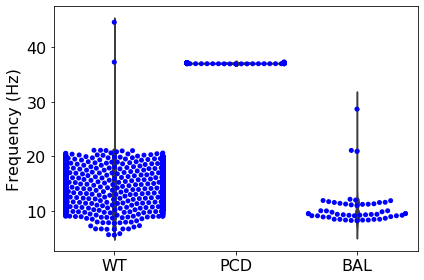

In [11]:
if zplot == True:
    plt.figure() #(figsize=(12,5))
    sns.violinplot(data=df, inner="points", orient="v")
    #b = sns.swarmplot(data = df, color = "w", orient="v", dodge = True, size = 5)
    b = sns.swarmplot(data = df, color = "b", orient="v", dodge = True) #, size = 5)
    #b.axes.set_title("Title",fontsize=20)
    #b.set_xlabel("Control (patch)",fontsize=16)
    b.set_ylabel("Frequency (Hz)",fontsize=16)
    b.tick_params(labelsize=16)
    plt.tight_layout()
    
    # save fig
    if zsave == True:
        #script_dir = os.path.abspath('..') #os.path.dirname('..')
        results_dir = os.path.join(directory, 'Results/')
        file_name = 'CBF_distribution_violin_{}.png'.format(dt.datetime.now().strftime('%Y%m%d%H%M%S'))
        if not os.path.isdir(results_dir):    
            os.makedirs(results_dir)
        plt.savefig(results_dir + file_name,dpi=130)
        
    plt.show()

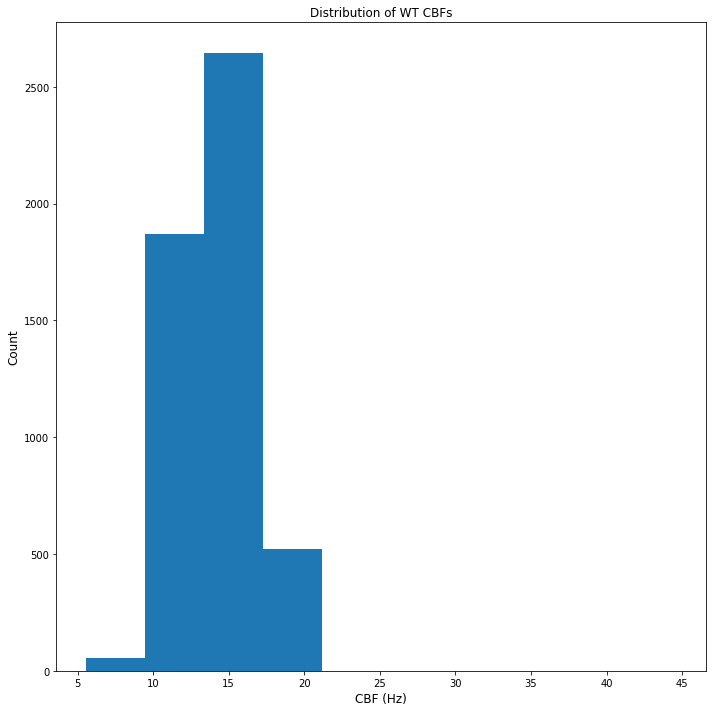

In [12]:
if zplot == True:
    #%matplotlib inline

    #plot of frequencies
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    #ax.plot(x,y, 'ko')
    #ax.set_ylim(-1,1)
    ax.set_title("Distribution of WT CBFs", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_xlabel("CBF (Hz)", fontsize=12)
    
    plt.hist(WT_freq)
    plt.tight_layout()

    # save fig
    if zsave == True:
        #script_dir = os.path.abspath('..') #os.path.dirname('..')
        results_dir = os.path.join(directory, 'Results/')
        file_name = 'CBF_distribution_histogram{}.png'.format(dt.datetime.now().strftime('%Y%m%d%H%M%S'))
        if not os.path.isdir(results_dir):    
            os.makedirs(results_dir)
        plt.savefig(results_dir + file_name,dpi=130)
        
    plt.show()